# Table of Contents
- `scikit-learn` intro
    - Data representation
    - The `Estimator` interface
    - The `sklearn.datasets` module
- Data preprocessing in scikit-learn
    - Encoding categorical features
    - Dimensionality reduction with PCA
    - Data normalization
    - Sampling and rebalancing with `imblearn`

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## `scikit-learn` intro
[`scikit-learn`](http://scikit-learn.org), or `sklearn`, is a Python package designed to give access to well-known **machine learning algorithms within Python** code, through a clean, well-thought-out API. It has been built by hundreds of contributors from around the world, and is used across industry and academia.

`scikit-learn` is built upon Python's [`NumPy`](http://www.numpy.org/) (Numerical Python) and [`SciPy`](http://www.scipy.org/) (Scientific Python) libraries, which enable efficient in-core numerical and scientific computation within Python. As such, scikit-learn is not specifically designed for extremely large datasets, though there is some work in this area.

### Data Representation

Most machine learning algorithms implemented in scikit-learn expect a **two-dimensional array or matrix** `X`, usually represented as a NumPy ndarray. The expected shape of `X` is `(n_samples, n_features)`.

* `n_samples`: The number of samples, where each sample is an item to process (e.g., classify). A sample can be a document, a picture, a sound, a video, a row in database or CSV file, or whatever you can describe with a fixed set of quantitative traits.
* `n_features`:	The number of features or distinct traits that can be used to describe each item in a quantitative manner. 

The *supervised* machine learning algorithms implemented in scikit-learn also expect a **one-dimensional array** `y` with shape `(n_samples,)`. This array associated a target class to every sample in the input `X`.

![data-layout.png](images/data-layout.png)



#### Supervised Learning

![supervised machine learning overview](images/plot_ML_flow_chart_12.png)

In the supervised learning paradigm the training data (observations, measurements, etc.) are accompanied by labels indicating the class of the
observations.

After training, the fitted model does no longer expect the label `y` as an input: it will try to predict the most likely labels `y_new` for a new set of samples `X_new`.

Depending on the nature of the target `y`, supervised learning can be given different names:

* If `y` has values in a fixed set of **categorical outcomes** (represented by integers) the task to predict `y` is called **classification**.
* If `y` has **floating point values** (e.g. to represent a price, a temperature, a size...), the task to predict `y` is called **regression**.

#### Unsupervised Learning
Unsupervised learning addresses a different sort of problem. Here the class labels of training data is unknown, and we are interested in finding similarities between the observations. 
An unsupervised learning algorithm only uses a single set of observations `X` with shape `(n_samples, n_features)` and does not use any kind of labels.

Unsupervised learning comprises tasks such as *dimensionality reduction* and *clustering*.

### The `scikit-learn`'s estimator interface

Scikit-learn strives to have a uniform interface across all methods. 
The main objects in scikit-learn are the following: 
- estimator (base object)
- predictor
- transformer

Note that one class can implement multiple interfaces.

#### Estimator
Every algorithm is exposed in scikit-learn via an **estimator** object, which implements a `fit` method to learn from data, either:
- `estimator = estimator.fit(data, targets)`, for supervised learning applications.
- `estimator = estimator.fit(data)`, for unsupervised learning applications.


The behaviour of an estimator typically depends on a number of parameters. The parameters of an estimator can be set when it is instantiated or by modifying the corresponding attribute:
- `estimator = Estimator(param1=1, param2=2)`

#### Predictor
For supervised learning, or some unsupervised problems, the **predictor** object implements the following method:

- `prediction = predictor.predict(data)`: given a "fitted" model, predict the label of a new set of data. This method accepts one argument, the array of observations, and returns the predicted label for each observation in the array.

Classification algorithms usually also offer a way to quantify certainty of a prediction, either using `decision_function` or `predict_proba`:

- `probability = predictor.predict_proba(data)`: clearly, the label with the highest probability is returned by `predictor.predict`.


#### Transformer
The transformer object is used for filtering or modifying the data, in a supervised or unsupervised way. It implements the following method:
- `new_data = transformer.transform(data)`

When fitting and transforming can be performed much more efficiently together than separately, implements:

- ` new_data = transformer.fit_transform(data)`

### The `sklearn.datasets` module

`sklearn.datasets` [docs](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)

In our previous lectures, we have imported the iris-dataset from a ".csv" file
```python
iris_df = pd.read_csv(os.path.join('dataset','iris.csv'))
```

Actually, scikit-learn comes with a few standard datasets. The `sklearn.datasets` module includes utilities to load datasets, including methods to load and fetch popular reference datasets. It also features some artificial data generators.





#### Load Iris dataset
The library embeds a copy of the Iris CSV file along with a helper function to load it into NumPy arrays.


In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
type(iris)

sklearn.utils._bunch.Bunch

In [4]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

The features of each sample flower are stored in the `data` attribute of the dataset:

In [6]:
n_samples, n_features = iris.data.shape

print(n_samples)
print(n_features)
print(iris.data[0])

150
4
[5.1 3.5 1.4 0.2]


The information about the class of each sample is stored in the `target` attribute of the dataset:

In [7]:
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [8]:
print(iris.target)
iris.target_names

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Know the class distribution from numpy arrays.

In [9]:
unique, counts = np.unique(iris.target, return_counts = True)
dict(zip(unique,counts))

{0: 50, 1: 50, 2: 50}

Equivalently:

In [10]:
pd.Series(iris.target).value_counts()

0    50
1    50
2    50
dtype: int64

#### Generate artificial data


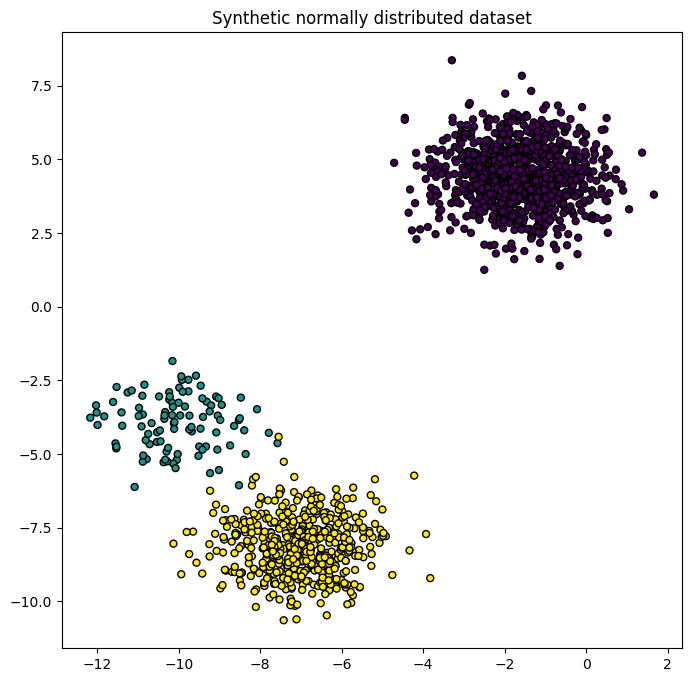

In [11]:
from sklearn.datasets import make_blobs

plt.figure(figsize=(8, 8))
plt.title("Synthetic normally distributed dataset")
X1, Y1 = make_blobs(n_samples= [1000,100,500],n_features=2,random_state = 1)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")



## Data preprocessing in scikit-learn

    - ☑️ in previous notebooks
    - ✅ in this notebook

Major Tasks in data preprocessing:
- Data cleaning
    - Handling missing values (on HYPOTHYROID dataset) ☑️ (e.g., `sklearn.impute`, `pd.DataFrame.fillna`)
    - Smooth noisy data
    - Identify or remove outliers
    - Resolve inconsistencies
    - <font color='blue'>Encoding categorical features</font> ✅(e.g.,  `sklearn.preprocessing.OneHotEncoder`, `OrdinalEncoder`)
- Data integration

- Data reduction
    - <font color='blue'>Dimensionality reduction</font>  ✅ (e.g., `sklearn.decomposition.PCA`)
    - Numerosity reduction
        - Parametric methods
        - Non parametric methods (on IRIS dataset) ☑️
            - Sampling ☑️ (e.g., `pd.DataFrame.sample`)
                - Simple random sampling with replacement ☑️
                - Simple random sampling without replacement ☑️
- <font color=blue>Data rebalancing</font> 
    - <font color=blue>Sampling and rebalancing with `imblearn`</font>  ✅
        
- <font color=blue>Data transformation and data discretization</font> 
    - <font color=blue>Normalization</font> ✅ (e.g.,  `sklearn.preprocessing.MinMaxScaler`, `StandaradScaler`, `RobustScaler`)
    - Concept Hierarchy Generation
    - Discretization with pandas (on IRIS dataset) ☑️ (e.g., `pd.cut` and `pd.qcut`) 
        - Equal width binning ☑️
        - Equal frequency binning ☑️

### Encoding categorical features

Most sklearn estimators expect numerical variables in input. 
It is crucial to encode categorical variables into a numeric representation.


In [12]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

#### Ordinal encoder
Convert ordinal categorical features to integer codes. (Notice that an assumption is implicitly made on the magnitude of successive values)

In [13]:
X = [['Low','Low'], ['Medium','High'], ['High','Low']]
np.asarray(X)

array([['Low', 'Low'],
       ['Medium', 'High'],
       ['High', 'Low']], dtype='<U6')

In [14]:
enc = OrdinalEncoder()  # by default, lexicographic order
enc.fit(X)
enc.transform(X) 

array([[1., 1.],
       [2., 0.],
       [0., 1.]])

In [15]:
enc = OrdinalEncoder(categories=[['Low','Medium','High'],['Low','Medium','High']]) # set custom order
enc.fit(X)
enc.transform(X)

array([[0., 0.],
       [1., 2.],
       [2., 0.]])

#### OneHot encoder

Encode nominal categorical features as a one-hot numeric array. (Nominal = 'categories, states, or "names of things"')

In [16]:
enc = OneHotEncoder()

     # mainland,  browser,   smoker
X = [['US',      'Safari',  'yes'], 
     ['Europe',  'Firefox', 'no'], 
     ['Europe',  'Chrome',  'yes']]

In [17]:
np.asarray(X)

array([['US', 'Safari', 'yes'],
       ['Europe', 'Firefox', 'no'],
       ['Europe', 'Chrome', 'yes']], dtype='<U7')

In [18]:
enc.fit(X)
enc.transform(X).toarray()

array([[0., 1., 0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 0., 0., 1.]])

In [19]:
enc.categories_

[array(['Europe', 'US'], dtype=object),
 array(['Chrome', 'Firefox', 'Safari'], dtype=object),
 array(['no', 'yes'], dtype=object)]

In [20]:
enc.get_feature_names_out(['mainland','browswer','smoker'])

array(['mainland_Europe', 'mainland_US', 'browswer_Chrome',
       'browswer_Firefox', 'browswer_Safari', 'smoker_no', 'smoker_yes'],
      dtype=object)

In [21]:
enc = OneHotEncoder(drop = 'first') # 'first' drop the first category in each feature

     # mainland,  browser,   smoker
X = [['US',      'Safari',  'yes'], 
     ['Europe',  'Firefox', 'no'], 
     ['Europe',  'Chrome',  'yes']]

enc.fit(X)
enc.transform(X).toarray()

array([[1., 0., 1., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])

In [22]:
enc.get_feature_names_out(['mainland','browswer','smoker'])

array(['mainland_US', 'browswer_Firefox', 'browswer_Safari', 'smoker_yes'],
      dtype=object)

Notice that the same transformation can be obtained by using the pandas `pd.get_dummies` utility function.


In [23]:
X = [['US', 'Safari', 'yes'], 
     ['Europe', 'Firefox', 'no'], 
     ['Europe', 'Chrome', 'yes']]
df = pd.DataFrame(X,columns = ['mainland','browser','smoker'])

In [24]:
pd.get_dummies(df)

mainland_Europe  mainland_US  browser_Chrome  browser_Firefox  \
0                0            1               0                0   
1                1            0               0                1   
2                1            0               1                0   

   browser_Safari  smoker_no  smoker_yes  
0               1          0           1  
1               0          1           0  
2               0          0           1

### Dimensionality reduction: PCA

Principle Component Analysis (PCA) finds a projection that captures the largest amount of variation in data. It can be effectively used as a dimensionality reduction technique. 


Consider the Iris dataset. It cannot be visualized in a single 2D plot, as it has 4 features. We are going to extract 2 combinations of sepal and petal dimensions to visualize it.

In [25]:
from sklearn.decomposition import PCA

In [26]:
PCA?

In [27]:
X, y = iris.data, iris.target  

In general, scaling (actually, standardizing = rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one) is important, for how PCA is performed in sklearn.

PCA is a variance maximization exercize: 
- Suppose you describe a group of people in terms of height (in meters) and weight (in kilos).
- Height varies less than weight because of their respective scales.
- PCA might determine that the direction of maximal variance more closely corresponds with the 'weight' axis, if those features are not scaled. This is misleading, as a change in height of one meter can be considered much more important than the change in weight of one kilogram.


In this case, however, we can directly apply PCA to the original dataset as the range of variables is comparable.


In [28]:
pca = PCA(n_components=0.95)
pca.fit(X)
X_reduced = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)


Reduced dataset shape: (150, 2)


In [29]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [30]:
pca.explained_variance_

array([4.22824171, 0.24267075])

In [31]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

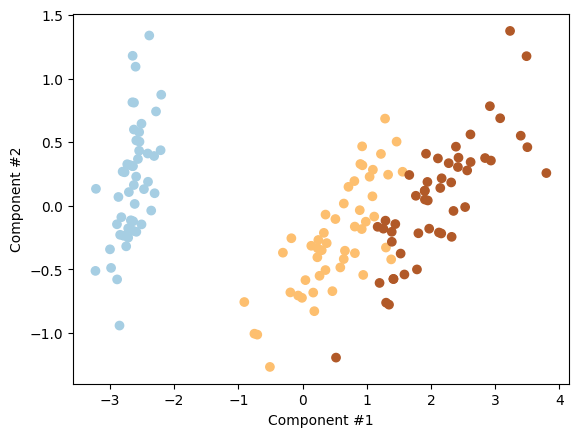

In [32]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='Paired')
plt.xlabel('Component #1')
plt.ylabel('Component #2')
plt.show()

In [33]:
import plotly.express as px
df = px.data.iris()
pca = PCA(n_components=3)
components = pca.fit_transform(X) # notice that we are coupling fit and transform in a single statement

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=y,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [34]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In the Iris dataset, the first principal component explains more than 90% of the variance of the dataset. 

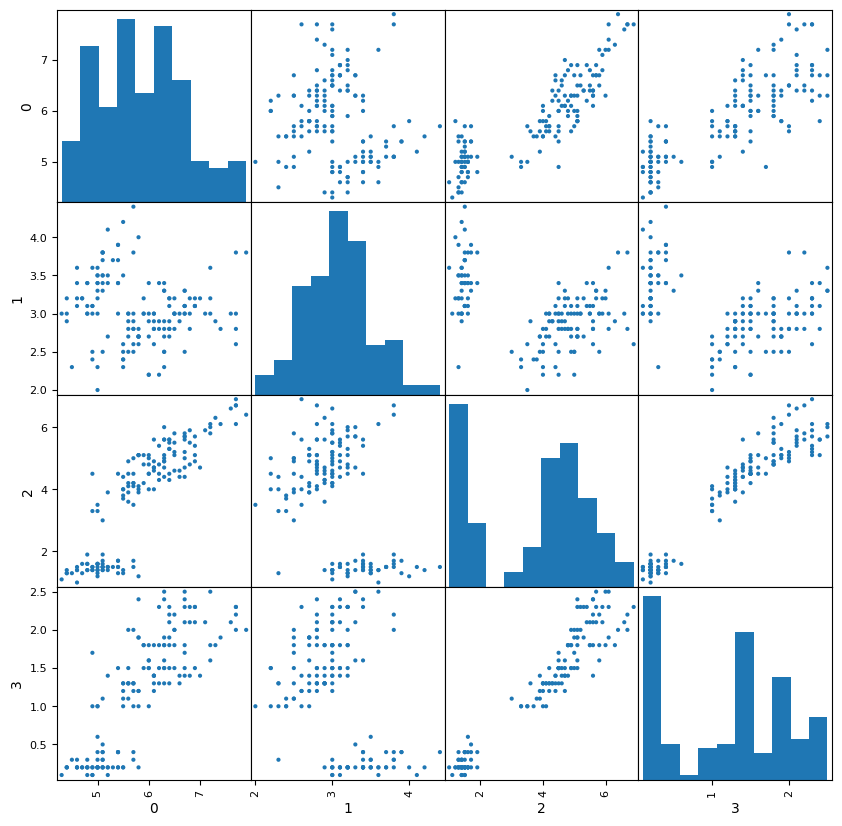

In [35]:
from pandas.plotting import scatter_matrix
scatter_matrix(pd.DataFrame(X),alpha = 1,figsize = (10,10))
plt.show()

In [36]:
pca = PCA(n_components=4)
transformed_X = pca.fit_transform(X)

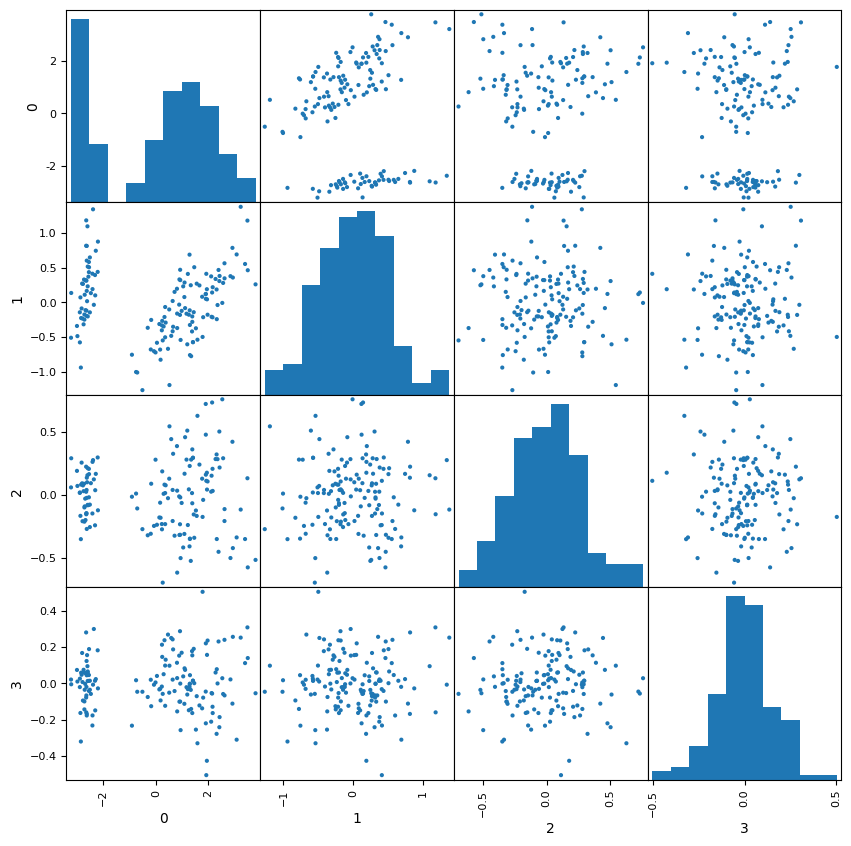

In [37]:
scatter_matrix(pd.DataFrame(transformed_X),alpha = 1,figsize = (10,10))
plt.show()

The scatter plots changes after PCA transformation, and suggest how PCA finds uncorrelated components.

### Data Normalization

Extracted from [here](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py).

Some plotting utilities from above source.

In [38]:
from matplotlib import cm
from matplotlib import colors, colorbar

# plasma does not exist in matplotlib < 1.5
cmap = getattr(cm, "plasma_r", cm.hot_r)


def create_axes(title, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return (
        (ax_scatter, ax_histy, ax_histx),
        (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
        ax_colorbar,
    )


def plot_distribution(axes, X, y, hist_nbins=50, title="", x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cmap(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker="o", s=5, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(
        X[:, 1], bins=hist_nbins, orientation="horizontal", color="grey", ec="grey"
    )
    hist_X1.axis("off")

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(
        X[:, 0], bins=hist_nbins, orientation="vertical", color="grey", ec="grey"
    )
    hist_X0.axis("off")
    
    
def make_plot(title, data):
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    # full data
    plot_distribution(
        axarr[0],
        data,
        y,
        hist_nbins=200,
        x0_label=feature_mapping[features[0]],
        x1_label=feature_mapping[features[1]],
        title="Full data",
    )

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(data[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(data[:, 1], zoom_in_percentile_range)

    non_outliers_mask = np.all(data > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) & np.all(
        data < [cutoffs_X0[1], cutoffs_X1[1]], axis=1
    )
    plot_distribution(
        axarr[1],
        data[non_outliers_mask],
        y[non_outliers_mask],
        hist_nbins=50,
        x0_label=feature_mapping[features[0]],
        x1_label=feature_mapping[features[1]],
        title="Zoom-in",
    )

    # colorbar
    norm = colors.Normalize(y_full.min(), y_full.max())
    colorbar.ColorbarBase(
        ax_colorbar,
        cmap=cmap,
        norm=norm,
        orientation="vertical",
        label="Color mapping for values of y",
    )

Fetch the california housing datasets using the sklearn utility.

In [39]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
feature_names = dataset.feature_names
feature_mapping = {
    "MedInc": "Median income in block group",
    "HousAge": "Median house age in block group",
    "AveRooms": "Average number of rooms per household",
    "AveBedrms": "Average number of bedrooms per household",
    "Population": "Block group population",
    "AveOccup": "Average house occupancy (number of household members)",
    "Latitude": "Block group latitude",
    "Longitude": "Block group longitude",
}


In [40]:
from sklearn.preprocessing import minmax_scale
X_full, y_full = dataset.data, dataset.target
y = minmax_scale(y_full) # scale the output between 0 and 1 for the colorbar
X_full.shape

(20640, 8)


A *block group* is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

A *household* is a group of people residing within a home. Since the average number of rooms and bedrooms in this dataset are provided per household, these columns may take surpinsingly large values for block groups with few households and many empty houses, such as vacation resorts.



The target variable is the **median house value** for California districts, expressed in hundreds of thousands of dollars ($100,000).


In [41]:
df = pd.DataFrame(np.concatenate((dataset.data,np.expand_dims(dataset.target,-1)),axis = 1),
                  columns = dataset.feature_names+['MedianHouseVal'])


In [42]:
df.describe().T

count         mean          std         min         25%  \
MedInc          20640.0     3.870671     1.899822    0.499900    2.563400   
HouseAge        20640.0    28.639486    12.585558    1.000000   18.000000   
AveRooms        20640.0     5.429000     2.474173    0.846154    4.440716   
AveBedrms       20640.0     1.096675     0.473911    0.333333    1.006079   
Population      20640.0  1425.476744  1132.462122    3.000000  787.000000   
AveOccup        20640.0     3.070655    10.386050    0.692308    2.429741   
Latitude        20640.0    35.631861     2.135952   32.540000   33.930000   
Longitude       20640.0  -119.569704     2.003532 -124.350000 -121.800000   
MedianHouseVal  20640.0     2.068558     1.153956    0.149990    1.196000   

                        50%          75%           max  
MedInc             3.534800     4.743250     15.000100  
HouseAge          29.000000    37.000000     52.000000  
AveRooms           5.229129     6.052381    141.909091  
AveBedrms          1.048780     1.099526     34.066667  
Population      1166.000000  1725.000000  35682.000000  
AveOccup           2.818116     3.282261   1243.333333  
Latitude          34.260000    37.710000     41.950000  
Longitude       -118.490000  -118.010000   -114.310000  
MedianHouseVal     1.797000     2.647250      5.000010

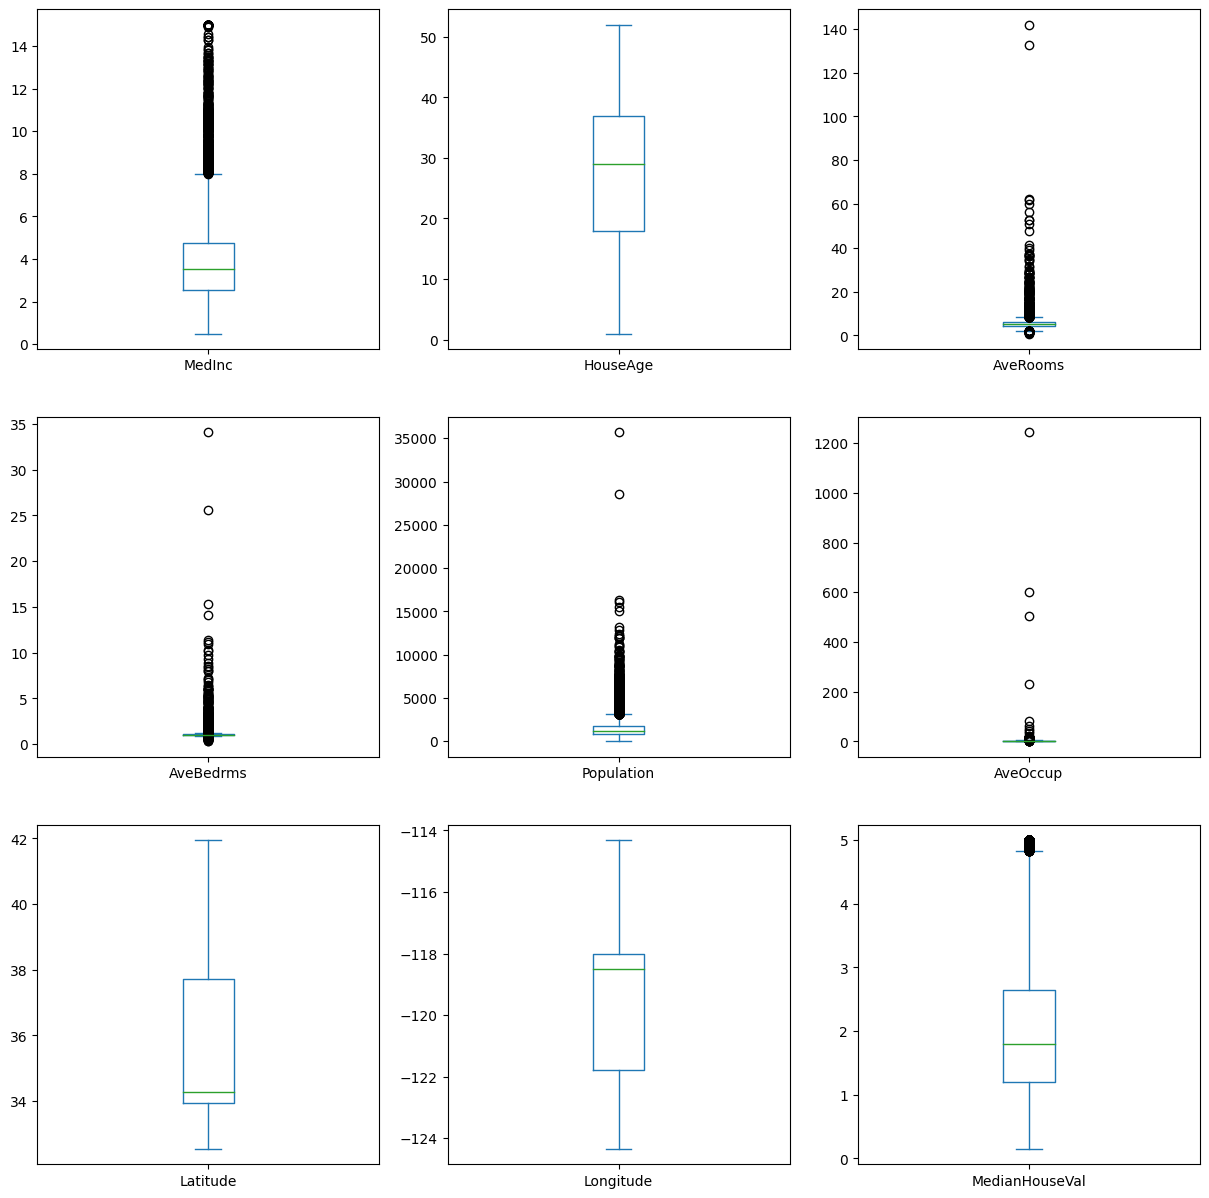

In [43]:
df.plot(kind ='box', 
        subplots = True, 
        figsize=(15,15),
        layout = (3,3),
        sharey=False)
plt.show()

Notice that the maximum value of "Average Occupancy" (AveOccup) is far beyond the value of the third quartile.

In [44]:
features = ["MedInc", "AveOccup"]
features_idx = [feature_names.index(feature) for feature in features]
X = X_full[:, features_idx]

We will analyze the behaviour of the following **scalers**:
- StandardScaler
- MinMaxScaler
- RobustScaler

Notice that all of them operate on the various features independently.

**Plot structure**:
- left plot: entire dataset
- right plot: zoomed-in plot to show the dataset without the marginal outliers (keeping data within 99-percentile)

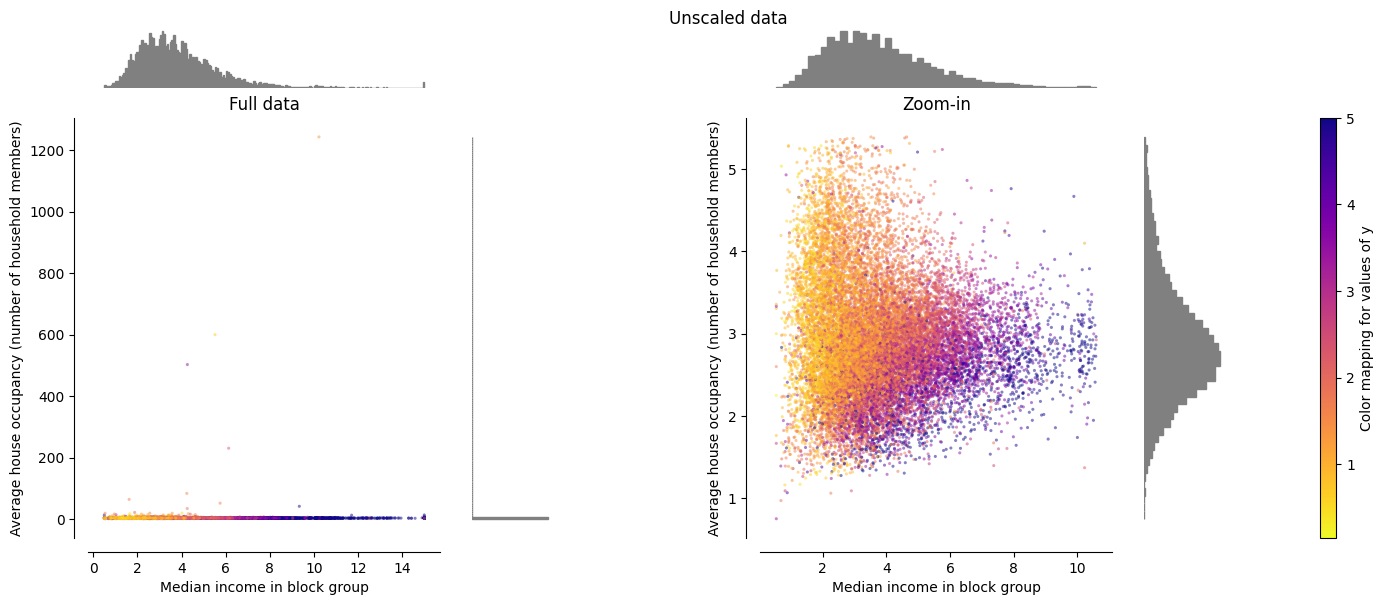

In [45]:
make_plot("Unscaled data", X)

A large majority of the samples are compacted to a specific range, [0, 10] for the median income and [0, 6] for the average house occupancy. Note that there are some marginal outliers (some blocks have average occupancy of more than 1200).

#### Standard Scaler
- The motivation to use this scaling lies in the fact that many machine learning estimators might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance. In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.



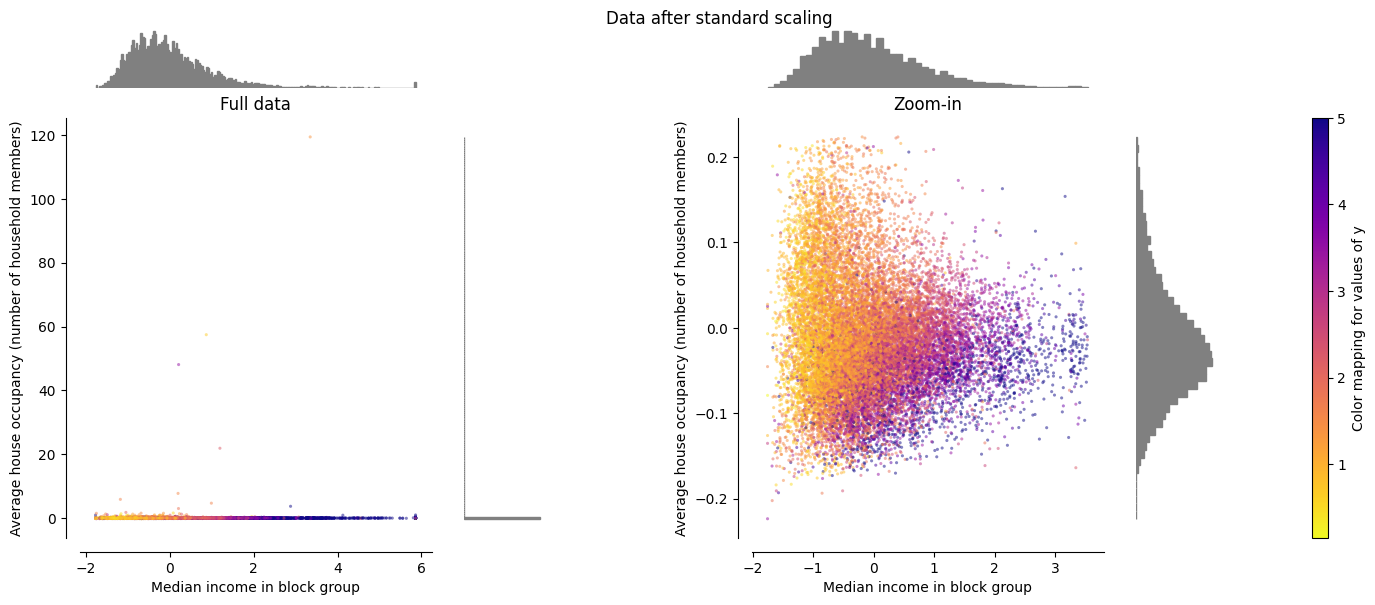

In [46]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
X_scaled =  scaler.fit_transform(X)
make_plot("Data after standard scaling",X_scaled)

In [47]:
scaler.mean_, scaler.scale_

(array([3.870671  , 3.07065516]), array([ 1.89977569, 10.38579796]))

In [48]:
X_scaled.mean(axis=0), X_scaled.std(axis=0)


(array([6.60969987e-17, 3.44255201e-18]), array([1., 1.]))

The `StandardScaler` removes the mean and scales the data to unit variance. The scaling shrinks the range of the feature values as shown in the left figure below.

Due to outliers magnitude, however, most of the data lie in the [-2, 4] range for the transformed median income feature while the same data is squeezed in the smaller [-0.2, 0.2] range for the transformed average house occupancy. `StandardScaler` therefore cannot guarantee balanced feature scales in the presence of outliers.

#### MinMax Scaler

- The motivation to use this scaling include robustness to very small standard deviations of features and preserving zero entries in sparse data.


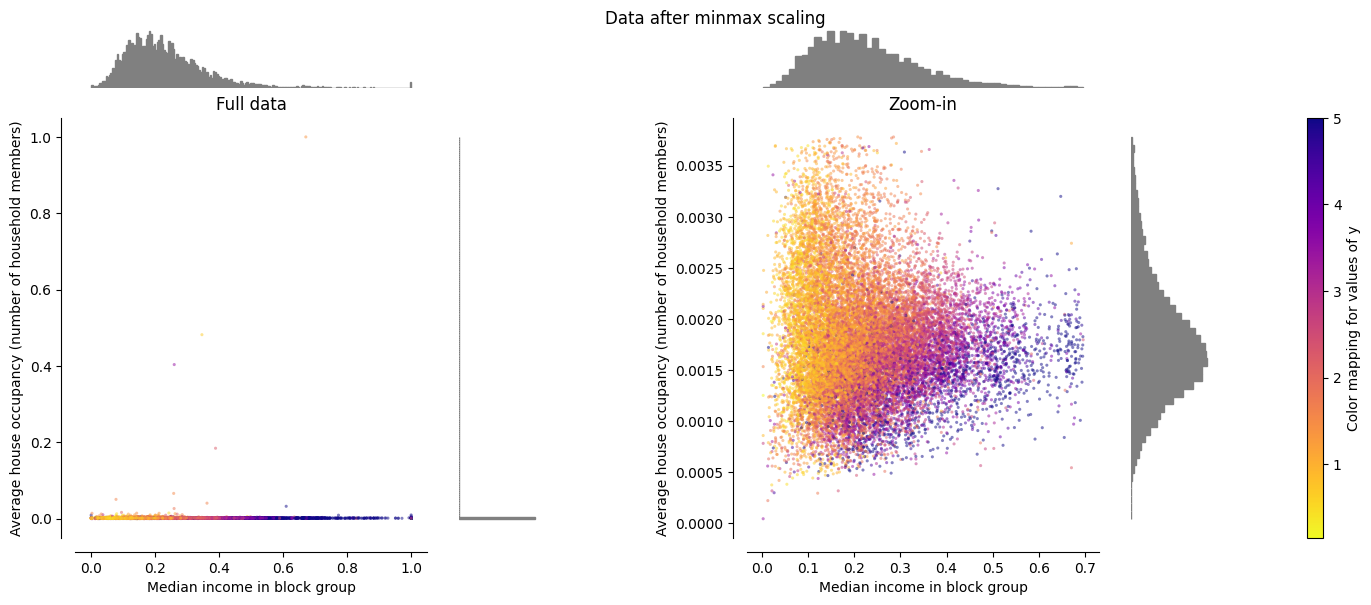

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
X_scaled =  scaler.fit_transform(X)
make_plot("Data after minmax scaling",X_scaled)

In [50]:
X_scaled.min(axis=0), X_scaled.max(axis=0)

(array([0., 0.]), array([1., 1.]))

The `MinMaxScaler` rescales the data set such that all feature values are in
the range [0, 1]. 

However, this scaling compresses all inliers into the narrow range [0, 0.005] for the transformed average house occupancy.


Both `StandardScaler` and `MinMaxScaler` are very sensitive to the
presence of outliers.

#### Robust Scaler
- Whenever data contains many outliers, scaling using the mean and variance of the data is likely to not work very well (same for MinMax scaling). In these cases, RobustScaler can be used as it exploits more robust estimates for the center and range of data.

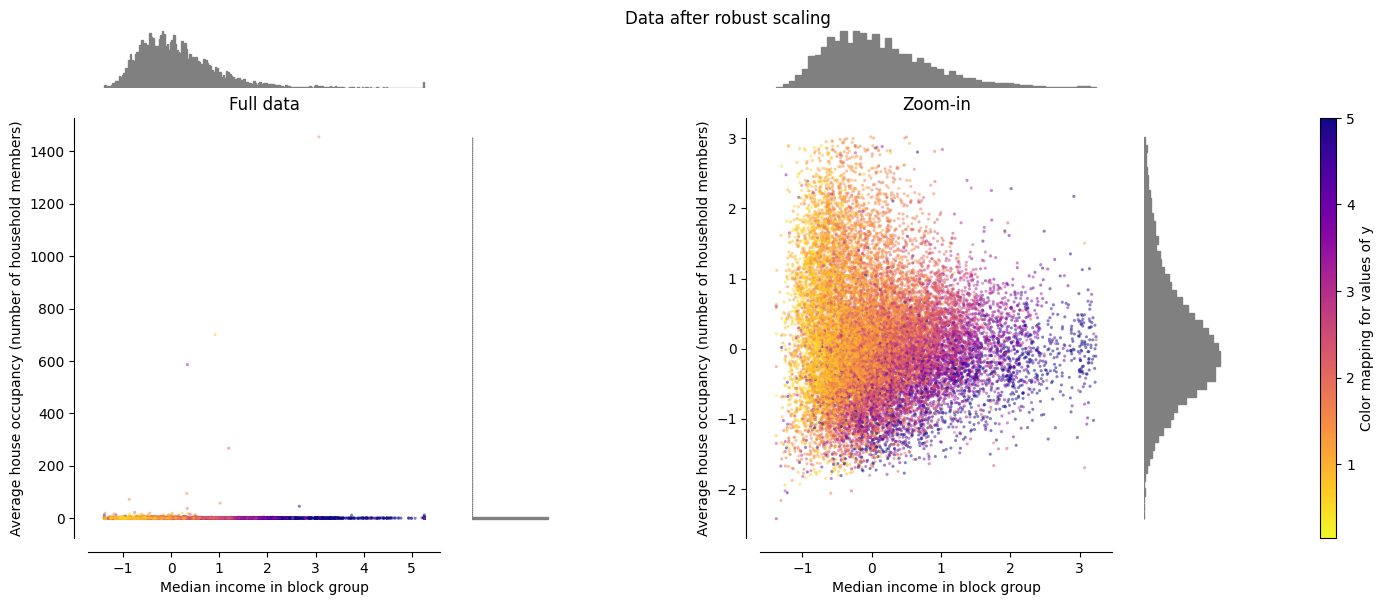

In [51]:
from sklearn.preprocessing import RobustScaler
scaler =  RobustScaler(quantile_range=(25.0, 75.0))
X_scaled =  scaler.fit_transform(X)
make_plot("Data after robust scaling",X_scaled)

In [52]:
scaler.center_,scaler.scale_

(array([3.5348    , 2.81811565]), array([2.17985   , 0.85251978]))

The `RobustScaler` removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

The centering and scaling statistics of `RobustScaler` are based on percentiles and are therefore not influenced by a small number of very large marginal outliers. 
Consequently, the resulting range of the transformed feature values is larger than for the previous scalers and, more importantly, are approximately similar: for both features most of the transformed values lie in a [-2, 3] range as seen in the zoomed-in figure.



Note that the outliers themselves are still present in the transformed data. If a separate outlier clipping is desirable, a non-linear transformation is required (e.g., by using `QuantileTransformer`).

# Sampling and rebalancing with `imblearn`

Imbalanced-learn (imported as `imblearn`) is a library relying on scikit-learn and provides tools when dealing with classification with imbalanced classes. 
As such, it provides several samplers, which follows the scikit-learn API using the base estimator and implements a sampling functionality through the `fit_resample` method.



Generate an imbalanced dataset using sklearn utilities.

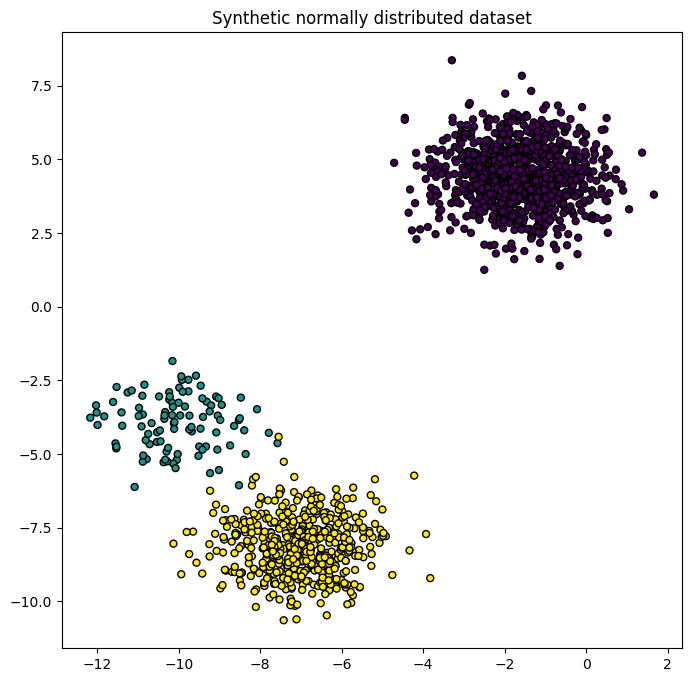

In [53]:
from sklearn.datasets import make_blobs

plt.figure(figsize=(8, 8))
plt.title("Synthetic normally distributed dataset")
X1, Y1 = make_blobs(n_samples=[1000,100,500],n_features=2,random_state=1)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")
plt.show()

In [54]:
pd.Series(Y1).value_counts()

0    1000
2     500
1     100
dtype: int64

In [55]:
from imblearn.under_sampling import RandomUnderSampler
sampler = RandomUnderSampler(random_state=42)
X1_RUS, Y1_RUS = sampler.fit_resample(X1, Y1)
print(pd.Series(Y1_RUS).value_counts())

0    100
1    100
2    100
dtype: int64


In [56]:
from imblearn.over_sampling import RandomOverSampler
sampler = RandomOverSampler(random_state=42)
X1_ROS, Y1_ROS = sampler.fit_resample(X1, Y1)
print(pd.Series(Y1_ROS).value_counts())


0    1000
2    1000
1    1000
dtype: int64


In [57]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE(random_state=42)
X1_SMOTE, Y1_SMOTE = sampler.fit_resample(X1, Y1)
print(pd.Series(Y1_SMOTE).value_counts())


0    1000
2    1000
1    1000
dtype: int64


All rebalancing methods ensure flexibility about sampling strategy and target ratio between classes: check the docs and specifically the `sampling_strategy` parameter.

Visual comparison of the three methods:

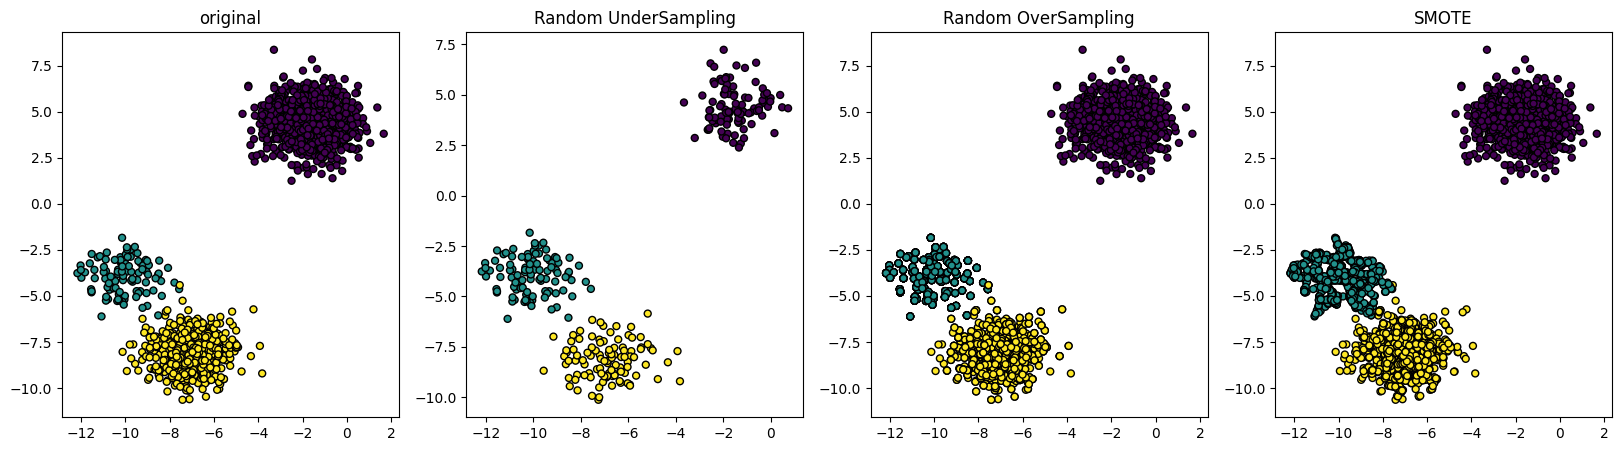

In [58]:
fig,ax = plt.subplots(1,4,figsize=(20,5))
ax[0].scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")
ax[0].set_title('original')
ax[1].scatter(X1_RUS[:, 0], X1_RUS[:, 1], marker="o", c=Y1_RUS, s=25, edgecolor="k")
ax[1].set_title('Random UnderSampling')
ax[2].scatter(X1_ROS[:, 0], X1_ROS[:, 1], marker="o", c=Y1_ROS, s=25, edgecolor="k")
ax[2].set_title('Random OverSampling')
ax[3].scatter(X1_SMOTE[:, 0], X1_SMOTE[:, 1], marker="o", c=Y1_SMOTE, s=25, edgecolor="k")
ax[3].set_title('SMOTE')
plt.show()


Several other methods/extensions are available in imblearn (see the [docs](https://imbalanced-learn.org/stable/references/index.html#api))


# <font color='blue'><ins>TASK</ins></font>
- 07_TASK-1: PCA
    - use the sklearn utility to load the *wine dataset* (`sklearn.dataset.load_wine`)
    - apply PCA to reduce the dimensionality of the dataset and to enable its visualization
    - visualize the reduced dataset using a scatter plot, representing instances from different classes with different colors.
- 07_TASK-2: Practice with imblearn
    - obtain and visually compare the following data rebalancing schemes on the same make_blobs dataset:
        - original (class 0: 1000, class 1: 100, class 2: 500)
        - class 0: 100, class 1: 100, class 2: 100
        - class 0: 200, class 1: 200, class 2: 200